In [358]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler,power_transform
from sklearn. preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing dataset from GitHub to jupyter notebook

In [276]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [ ]:
#loading into dataframe

In [277]:
df=pd.DataFrame(data=df)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
df.shape

(16468, 14)

In [279]:
df.dtypes #type and region are categorical value

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [69]:
#checking null values via heatmap and isnull

In [280]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [ ]:
#Only 1517 values are present (16468-14951)

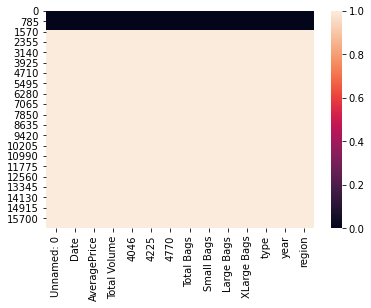

In [281]:
sn.heatmap(df.isnull()) # so many null values

In [282]:
df.describe() #count shows there are only values in 1517 rows

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [286]:
df["year"].unique() #only 2 years 

array([2015., 2016.])

In [285]:
df["type"].unique()  #only one type

array(['conventional'], dtype=object)

In [283]:
df.dropna(inplace=True) #dropping all nullvalues ,because only 1517 rows exist

In [284]:
df #verifying null rows are dropped

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [16]:
#unnamed is not useful hence removing it #only one type is present 

In [287]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [288]:
df.drop('type',axis=1,inplace=True)

In [289]:
df
#verifying unnamed and type is dropped 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte


In [ ]:
#CORREALTION 

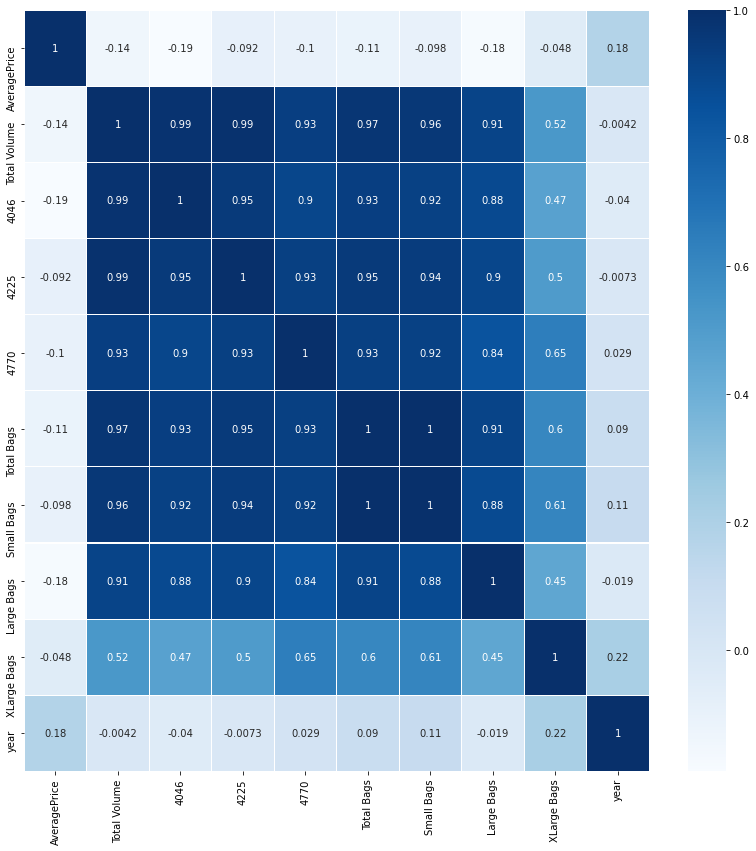

In [246]:
plt.figure(figsize=(14,14))
sn.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True)

In [ ]:
#features are correlated with each other apart from average price

In [247]:
corr_matrix=df.corr()
corr_matrix["AveragePrice"].sort_values(ascending = False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

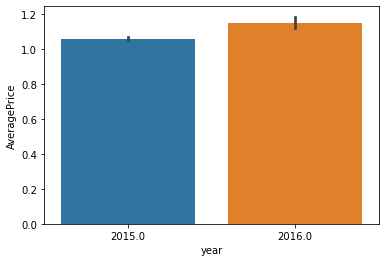

In [248]:
sn.barplot(x="year",y="AveragePrice",data=df) #year 2016 has highest average price

In [290]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

#converting date to use months and days .Year column is already present

In [291]:
df['Date']=pd.to_datetime(df['Date']).dt.date  #converting date coulmn to string to drop it as already have month ,day and year

In [292]:
df.drop('Date',axis=1,inplace=True)


In [293]:
df #to check whether date column is dropped

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,9,25


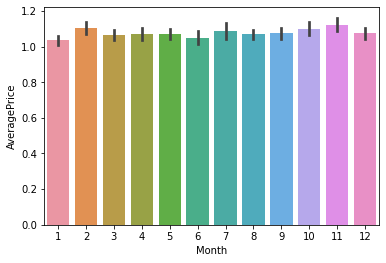

In [294]:
sn.barplot(x="Month",y="AveragePrice",data=df) #month vs average price

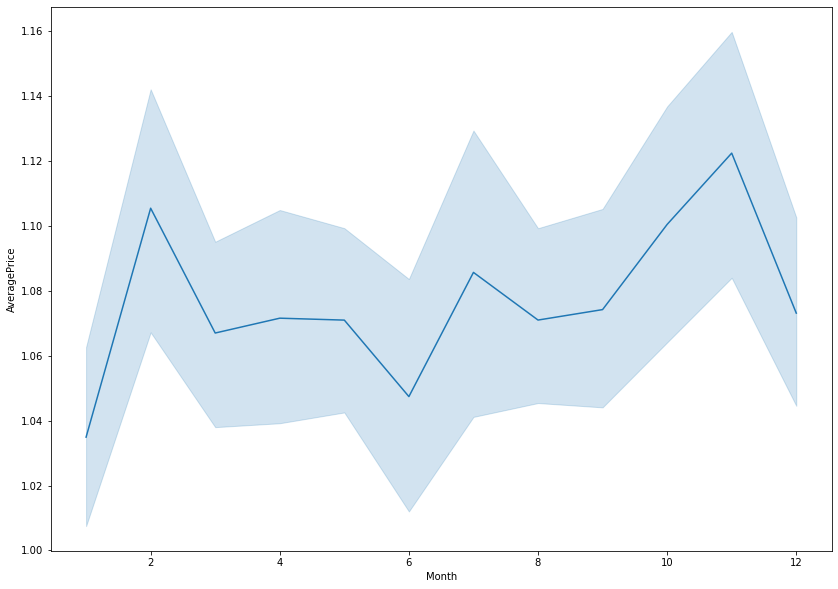

In [297]:
plt.figure(figsize=(14,10))
sn.lineplot(x= "Month",y="AveragePrice",data=df)
plt.show()
#hike between 8-10 th month and in 2nd month

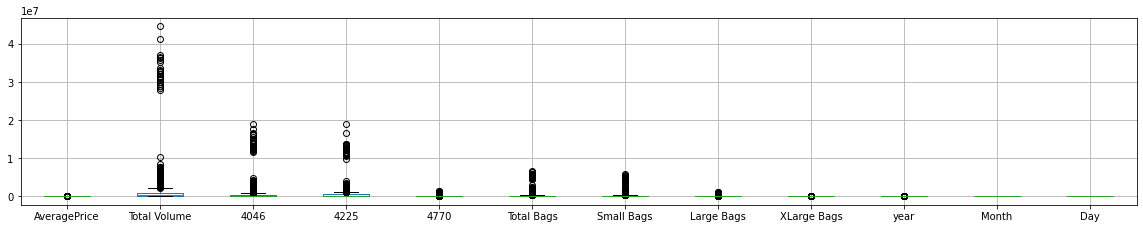

In [298]:
df.boxplot(figsize=(20,20))
plt.subplots_adjust(bottom=0.75)
plt.show()

In [299]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region           object
Month             int64
Day               int64
dtype: object

In [300]:
LE=LabelEncoder()
df["region"]=LE.fit_transform(df["region"]) #converting object to numerical value 

In [301]:
z=np.abs(zscore(df))
z.shape

(1517, 13)

In [162]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [302]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 13)
(1436, 13)


In [303]:
loss_percentage=(1517-1436)/1517*100
print(loss_percentage)

5.339485827290705


In [ ]:
#Above is an acceptable loss percentage

In [304]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [ ]:
#splitting data into target variable 

In [305]:
y=df["AveragePrice"]
X=df.drop("AveragePrice",axis=1)

In [263]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7,10,16
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7,9,10
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7,2,10
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7,9,25


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [340]:
SC=StandardScaler()
X=pd.DataFrame(SC.fit_transform(X),columns=X.columns)

In [345]:
maxr2=0
maxrs=0

for i in range(1,200):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
                                                    
print("Max accuracy is at",r2*100,"at random state",i)

Max accuracy is at 56.962115168498705 at random state 199


In [361]:
def eval(X):
    mod=X
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    print("R2 score is ",r2_score(y_test,pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
    print("Mean Sqaured Error: ", mean_squared_error(y_test,pred))
    print("Root Mean Absolute Error: ", np.sqrt(mean_absolute_error(y_test,pred)))
  

In [363]:
eval(DecisionTreeRegressor())

R2 score is  0.6024524796216241
Mean Absolute Error:  0.08157684630738522
Mean Sqaured Error:  0.013974650698602794
Root Mean Absolute Error:  0.2856166071981551


In [364]:
eval(LinearRegression())


R2 score is  0.1644248679391389
Mean Absolute Error:  0.13162639537578139
Mean Sqaured Error:  0.02937226370290444
Root Mean Absolute Error:  0.3628035217246125


In [365]:
eval(AdaBoostRegressor())

R2 score is  0.5866014530556004
Mean Absolute Error:  0.09837696782251137
Mean Sqaured Error:  0.014531848387230366
Root Mean Absolute Error:  0.3136510287286037


In [366]:
eval(GradientBoostingRegressor())

R2 score is  0.7434287797630608
Mean Absolute Error:  0.07324866688229853
Mean Sqaured Error:  0.009019030426131022
Root Mean Absolute Error:  0.2706449092118648


In [367]:
eval(KNeighborsRegressor())

R2 score is  0.3223754733133186
Mean Absolute Error:  0.1184191616766467
Mean Sqaured Error:  0.023819960079840316
Root Mean Absolute Error:  0.3441208533010557


In [ ]:
#Parameter tuning for Gradient as it has the highest r2 score

In [378]:
parameter ={'n_estimators':np.arange(2,100),'loss':['ls', 'lad','huber','exponential']}

In [381]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_ 

{'loss': 'ls', 'n_estimators': 99}

In [380]:
Final_mod=GradientBoostingRegressor(loss= 'ls',n_estimators =99)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
print(r2*100)
Final_mod


74.40440171957331


GradientBoostingRegressor(n_estimators=99)

In [382]:
import joblib
joblib.dump(Final_mod,"Avocado.pkl")

['Avocado.pkl']